In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz


In [3]:
df = pd.read_csv("job_descriptions.csv")


In [4]:
df['Salary_clean'] = (
    df['Salary Range']
    .astype(str)
    .str.replace('[^0-9]', '', regex=True)
    .astype(float)
)

df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')


In [6]:

df['Experience_clean'] = (
    df['Experience']
    .astype(str)
    .str.extract('(\d+)')  
    .astype(float)
)


In [7]:
filtered_df = df[
    (df['Country'].isin(['India', 'Germany'])) &
    (df['Qualifications'] == 'B.Tech') &
    (df['Work Type'] == 'Full-Time') &
    (df['Experience_clean'] > 2) &
    (df['Job Title'].isin(['Data Scientist', 'Art Teacher', 'Aerospace Engineer'])) &
    (df['Salary_clean'] > 10000) &
    (df['Job Portal'] == 'Indeed') &
    (df['Preference'] == 'Female') &
    (df['Job Posting Date'] < '2023-08-01') &
    (df['location'].notna()) &
    (df['location'].str.strip() != '') &
    (df['Company'].str.len() > 8)
]



In [8]:
filtered_df[['Country','Job Title']].head()


,Country,Job Title
756625,Germany,Art Teacher


In [9]:
stacked_data = (
    filtered_df
    .groupby(['Country', 'Job Title'])
    .size()
    .unstack(fill_value=0)
)


In [10]:
stacked_data


Job Title,Art Teacher
Country,
Germany,1


In [11]:
PREVIEW_MODE = True  

ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist).time()

start_time = datetime.strptime("15:00", "%H:%M").time()
end_time   = datetime.strptime("17:00", "%H:%M").time()


In [13]:

stacked_data = stacked_data.reindex(
    index=['India', 'Germany'],
    fill_value=0
)


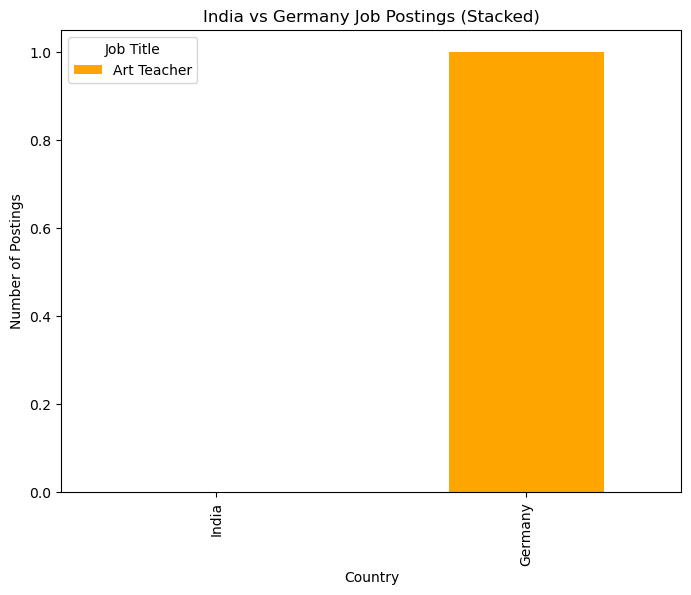

In [14]:
if stacked_data.sum().sum() == 0:
    print("No records satisfy all conditions.")

elif PREVIEW_MODE or (start_time <= current_time <= end_time):

    ax = stacked_data.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 6),
        color=['orange', 'green', 'blue'][:len(stacked_data.columns)]
    )

    plt.xlabel('Country')
    plt.ylabel('Number of Postings')
    plt.title('India vs Germany Job Postings (Stacked)')
    plt.legend(title='Job Title')
    plt.show()

else:
    print("Chart is visible only between 3 PM and 5 PM IST.")

